In [3]:
# HW7 - Twitter 

# Dependencies

import time
import tweepy
import apikeys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn
import csv
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


In [4]:
# Twitter API Keys
consumer_key = apikeys.TWITTER_CONSUMER_KEY
consumer_secret = apikeys.TWITTER_CONSUMER_SECRET
access_token = apikeys.TWITTER_ACCESS_TOKEN
access_token_secret = apikeys.TWITTER_ACCESS_TOKEN_SECRET

# Twitter credentials
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())


In [5]:
#Search through the different news names and collect Twitter data

# Target Search Term
news_terms = ["@BBC", "@CBS", "@CNN", "@Fox", "@NYTimes"]

compound_list = []
pos_list = []
neg_list = []
neutral_list = []
news_org = []
news_text = []
index = 0
count = []

for target in news_terms:
    
    index = 0
    
    public_tweets = api.user_timeline(screen_name=target, count=100)
    
    for tweet in public_tweets:
        
        text = tweet["text"]
        scores = analyzer.polarity_scores(text)
        compound = scores["compound"]
        pos = scores["pos"]
        neg = scores["neg"]
        neu = scores["neu"]
        news_name = target
            
        #Append the measure list
            
        compound_list.append(compound)
        pos_list.append(pos)
        neg_list.append(neg)
        neutral_list.append(neu)
        news_org.append(news_name)        
        news_text.append(text)
        count.append(index)
        index = index + 1



In [13]:
#Enter collected data in a Data Frame

sentiment_news={"News Agency":'', "Compound Score":'', "Positive Score":'', "Negative Score":'', "Neutral Score":'',
               "Status Tweet":'', "Count":''}
sentiment_news["News Agency"] = news_org
sentiment_news["Compound Score"] = compound_list
sentiment_news["Positive Score"] = pos_list
sentiment_news['Negative Score'] = neg_list
sentiment_news['Neutral Score'] = neutral_list
sentiment_news['Status Tweet'] = news_text
sentiment_news['Count'] = count

sentiment_news_df = pd.DataFrame(sentiment_news)

# Rearrange the data columns

sentiment_news_df = sentiment_news_df[["Count","News Agency","Compound Score","Positive Score","Negative Score",
                                      "Neutral Score", "Status Tweet"]]
# Save the file to a csv file

sentiment_news_df.to_csv("MediaSentiments.csv")
sentiment_news_df.head()

,Count,News Agency,Compound Score,Positive Score,Negative Score,Neutral Score,Status Tweet
0,0,@BBC,0.5743,0.179,0.000,0.821,GET EXCITED!! 🎤❤️️🎶\n@Camila_Cabello has set t...
1,1,@BBC,-0.3595,0.000,0.135,0.865,Have we got five eight-year-olds robbing house...
2,2,@BBC,0.7783,0.244,0.000,0.756,The history of condoms stretches back around 3...
3,3,@BBC,0.0000,0.000,0.000,1.000,Sexually frivolous and morally ambiguous. \nMe...
4,4,@BBC,0.8911,0.436,0.096,0.468,"RT @BBCWthrWatchers: Ok, so #snow can be a pai..."


In [14]:
# Overall Average Sentiments for each Media company.  Use this data for the Average Plots

sentiment_news_df.head()

avg_sentiment_df = sentiment_news_df.groupby("News Agency").mean()

avg_sentiment_df.head()

,Count,Compound Score,Positive Score,Negative Score,Neutral Score
News Agency,,,,,
@BBC,49.5,0.148951,0.10069,0.04565,0.85364
@CBS,49.5,0.376986,0.16166,0.01068,0.82766
@CNN,49.5,-0.025475,0.05943,0.06731,0.87326
@Fox,49.5,0.197157,0.14422,0.05133,0.80444
@NYTimes,49.5,-0.005266,0.08443,0.08213,0.83343


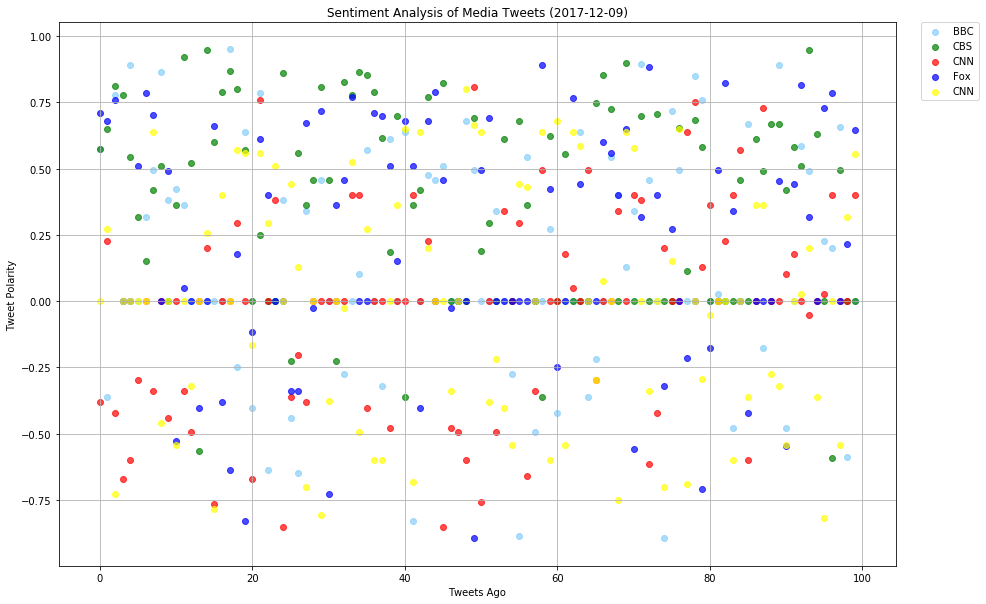

In [30]:
# Plot the scatter plot of Vader Sentiment Results

# Create new data frame per Media

bbc_df = sentiment_news_df.loc[sentiment_news_df["News Agency"] == '@BBC']
cnn_df = sentiment_news_df.loc[sentiment_news_df["News Agency"] == '@CNN']
cbs_df = sentiment_news_df.loc[sentiment_news_df["News Agency"] == '@CBS']
fox_df = sentiment_news_df.loc[sentiment_news_df["News Agency"] == '@Fox']
nyt_df = sentiment_news_df.loc[sentiment_news_df["News Agency"] == '@NYTimes']

# Obtain today's date

today_date = datetime.date.today()

# Plot a scatter plot per new dataframe

plt.figure(figsize=(15, 10))
plt.scatter(bbc_df['Count'], bbc_df['Compound Score'], marker='o', c='lightskyblue', alpha = 0.7, label = 'BBC')
plt.scatter(cbs_df['Count'], cbs_df['Compound Score'], marker='o', c='green', alpha = 0.7, label = 'CBS')
plt.scatter(cnn_df['Count'], cnn_df['Compound Score'], marker='o', c='red', alpha = 0.7, label = 'CNN')
plt.scatter(fox_df['Count'], fox_df['Compound Score'], marker='o', c='blue', alpha = 0.7, label = 'Fox')
plt.scatter(nyt_df['Count'], nyt_df['Compound Score'], marker='o', c='yellow', alpha = 0.7, label = 'CNN')
plt.legend(bbox_to_anchor=(1.03 , 1), loc=2, borderaxespad=0.)
plt.grid(True)
plt.title("Sentiment Analysis of Media Tweets "+"("+ str(today_date) + ")")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.savefig("MediaTweetPolarityScatter.png")
plt.show()

In [15]:
# Reset the index for avg sentiments for plotting

avg_sentiment_df = avg_sentiment_df.reset_index()

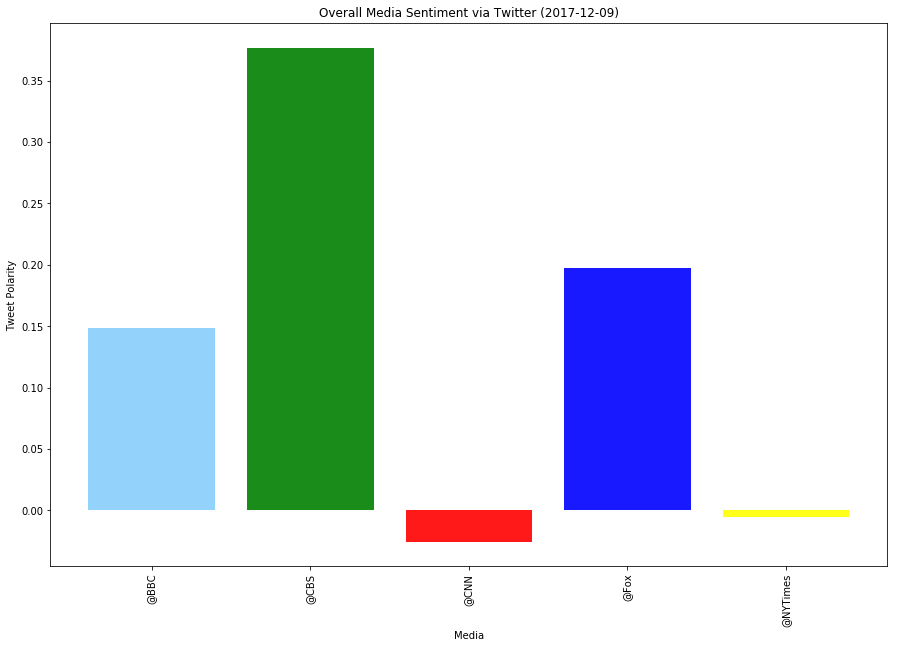

In [31]:
# Plot average Vader sentiments

avg_sentiment_df.head()

# Chart our data, give it a title, and label the axes

plt.figure(figsize=(15, 10))

a, b, c, d, e = plt.bar(avg_sentiment_df['News Agency'], avg_sentiment_df['Compound Score'], alpha=0.9)
a.set_facecolor('lightskyblue')
b.set_facecolor('green')
c.set_facecolor('red')
d.set_facecolor('blue')
e.set_facecolor('yellow')

plt.xticks(avg_sentiment_df['News Agency'], rotation="vertical")

plt.title("Overall Media Sentiment via Twitter " + "(" + str(today_date) + ")")
plt.xlabel("Media")
plt.ylabel("Tweet Polarity")
plt.savefig("MediaTweetPolarityBar.png")
plt.show()